In [1]:
#importing libraries 
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
import nltk 
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")
import re 
#all other required libraries will be imported at the time of requirement 

In [2]:
#reading the data 
df=pd.read_csv("train_set_taskA - train_set_Fire2022.csv")
#displaying first 10 rows 
display(df.head(10))

,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences
0,0,0,0,1,1,0,0,محبت کے پردے میں نفرت کرنےوالو
1,0,0,0,0,0,1,0,حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو...
2,0,0,0,0,0,0,1,اس نئے سال کی شام، ایک سپاہی قاتل (لارنس Fishb...
3,0,0,0,0,0,0,1,کچھ اس طرح سے ایک فلم کے لئے جا سکتے ہیں لیکن ...
4,0,0,0,0,0,0,1,"رون ہاورڈ اور اس کے ""ایڈیٹرز"" صرف اتنا کرنا ....."
5,0,0,0,0,0,0,0,نتائج دنیا کو حیرت میں ڈال سکتی ھے نتائج دس اق...
6,0,0,0,0,1,0,0,ہم غصے خراب موڈ خوشی اور غمی سب میں چپلی کباب ...
7,0,0,0,1,1,0,0,اب ایسی حیرت و وارفتگی کو کیا کہیے دعا کو ہاتھ...
8,0,0,0,1,1,0,0,دے تو رہے ہیں آپ اپنی آنکھوں سے نفرت کی پٹی ات...
9,0,0,0,0,1,0,0,حیرت ہوئی


In [3]:
#general statisitics about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anger      7800 non-null   int64 
 1   disgust    7800 non-null   int64 
 2   fear       7800 non-null   int64 
 3   sadness    7800 non-null   int64 
 4   surprise   7800 non-null   int64 
 5   happiness  7800 non-null   int64 
 6   neutral    7800 non-null   int64 
 7   Sentences  7800 non-null   object
dtypes: int64(7), object(1)
memory usage: 487.6+ KB


In [4]:
df.describe()

,anger,disgust,fear,sadness,surprise,happiness,neutral
count,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000
mean,0.103974,0.097564,0.078077,0.280769,0.198718,0.134103,0.386410
std,0.305247,0.296743,0.268310,0.449404,0.399061,0.340784,0.486958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().any()

anger        False
disgust      False
fear         False
sadness      False
surprise     False
happiness    False
neutral      False
Sentences    False
dtype: bool

In [6]:
df.isna().any()

anger        False
disgust      False
fear         False
sadness      False
surprise     False
happiness    False
neutral      False
Sentences    False
dtype: bool

# Transfer Learning Application

### Using the Multilingual BERT Model and Optuna Traansformers for the Multilabel Classification. 


In [7]:
#from wordcloud and Count Vectorizer it was found that the text had emojis as well as english text so we need to remove those as well
#removing emojis 
#also removing the english characters
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                  "]+", re.UNICODE)
df["Clean_Sentences"]=df["Sentences"].apply(lambda x:re.sub(emoj, '', x))
df["Clean_Sentences"]=df["Sentences"].apply(lambda x:re.sub(r"[A-Za-z0-9@;:]", "", x, flags=re.UNICODE) )

In [8]:
df

,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences,Clean_Sentences
0,0,0,0,1,1,0,0,محبت کے پردے میں نفرت کرنےوالو,محبت کے پردے میں نفرت کرنےوالو
1,0,0,0,0,0,1,0,حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو...,حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو...
2,0,0,0,0,0,0,1,اس نئے سال کی شام، ایک سپاہی قاتل (لارنس Fishb...,اس نئے سال کی شام، ایک سپاہی قاتل (لارنس ، کی ...
3,0,0,0,0,0,0,1,کچھ اس طرح سے ایک فلم کے لئے جا سکتے ہیں لیکن ...,کچھ اس طرح سے ایک فلم کے لئے جا سکتے ہیں لیکن ...
4,0,0,0,0,0,0,1,"رون ہاورڈ اور اس کے ""ایڈیٹرز"" صرف اتنا کرنا .....","رون ہاورڈ اور اس کے ""ایڈیٹرز"" صرف اتنا کرنا ....."
...,...,...,...,...,...,...,...,...,...
7795,0,0,0,0,0,0,1,آپ کس طرح نوجوان برطانوی اداکار کی اس قابل احت...,آپ کس طرح نوجوان برطانوی اداکار کی اس قابل احت...
7796,0,0,0,0,0,0,1,میں نے امریکہ کے کنفیڈریشن امریکہ میں ورجینیا ...,میں نے امریکہ کے کنفیڈریشن امریکہ میں ورجینیا ...
7797,0,0,0,0,0,1,0,سورۃ نمبر النساء آیت نمبر جب تم سفر پر جا رہے ...,سورۃ نمبر النساء آیت نمبر جب تم سفر پر جا رہے ...
7798,0,0,1,0,0,0,0,رونا یہ نہیں کہ حالات خراب ہیں اوراس بیماری نے...,رونا یہ نہیں کہ حالات خراب ہیں اوراس بیماری نے...


##### In the above dataframe the text data has been freed of all the english characters and Emojis or other special characters

### Optuna Sentence transformers are BERT/RoBERTa/XLM-Roberta etc. based and is used to achieve high performance on various tasks 

In [9]:
#importing other required libraries 
import os
import keras 
import tensorflow as tf 
import optuna 
from optuna import Trial 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import log_loss
from sentence_transformers import SentenceTransformer 
import torch 
import random 

#setting random seeds 
random.seed(42)
os.environ["PYTHONHASHSEED"]=str(42)
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)

2022-12-13 19:49:42.590688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 19:49:42.832508: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-13 19:49:42.889590: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-13 19:49:42.889623: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

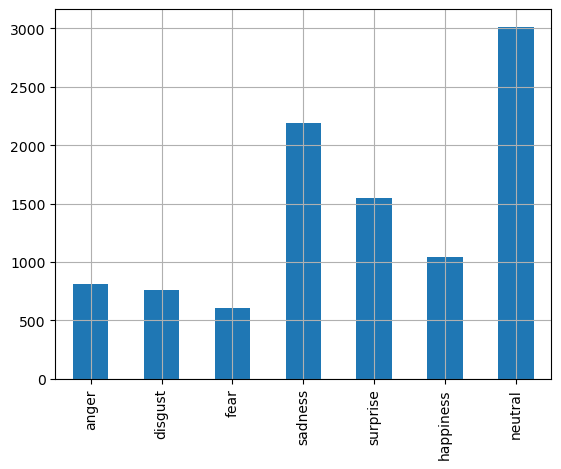

In [10]:
# Once again viewing the label count 
labels=df[["anger","disgust","fear","sadness","surprise","happiness","neutral"]]
labels.sum(axis=0).plot.bar()
plt.grid(True)
plt.show()

## Sentence Embedding using pre trained model

In [11]:
model=SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
model.max_seq_length=512#setting the maximum length of the model as it was visible in data analysis that most words length were less than 450
print("Max Length of Sequences is ------->",model.max_seq_length)

Max Length of Sequences is -------> 512


##### Now,we will do text embedding using sentence_transformer. It provides state-of-the-art pre-trained models for more than 50+ languages and is fine-tuned for various cases. For this project, we will be going to use bert-base-uncased model for embedding.

In [12]:
sentence_embeddings=model.encode(df["Clean_Sentences"])

In [17]:
#Splitting the embeddings of dataset into 80:20 ratio 
x_train_val,x_test,y_train_val,y_test=train_test_split(sentence_embeddings,labels,train_size=0.8,random_state=42)

In [37]:
def objective(trial):
    keras.backend.clear_session()
    train_x, valid_x, train_y, valid_y = train_test_split(train1_x, train1_y, train_size=0.8, test_size=0.2,
                                                                random_state=42)
    #optimum number of hidden layers
    n_layers = trial.suggest_int('n_layers', 1, 3)
    model = keras.Sequential()
    for i in range(n_layers):
        #optimum number of hidden nodes
        num_hidden = trial.suggest_int(f'n_units_l{i}', 48, len(sentence_embeddings[0]), log=True)
        #optimum activation function
        model.add(keras.layers.Dense(num_hidden, input_shape=(len(sentence_embeddings[0]),),
                               activation=trial.suggest_categorical(f'activation{i}', ['relu', 'linear','swish'])))
        #optimum dropout value
        model.add(keras.layers.Dropout(rate = trial.suggest_float(f'dropout{i}', 0.0, 0.6))) 
    model.add(keras.layers.Dense(5,activation=tf.keras.activations.sigmoid)) #output Layer
    val_ds = (valid_x,valid_y)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=1,min_lr=1e-05,verbose=0)
    early_stoping = EarlyStopping(monitor="val_loss",min_delta=0,patience=5,verbose=0,mode="auto", baseline=None,restore_best_weights=True)
    model.compile(loss='binary_crossentropy',metrics='categorical_crossentropy', optimizer='Adam')
    #optimum batch size
    histroy = model.fit(train_x,train_y, validation_data=val_ds,epochs=200,callbacks=[reduce_lr,early_stoping],verbose=0,
                       batch_size=trial.suggest_int('size', 8, 128))
    return min(histroy.history['val_loss'])

In [38]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, timeout=1200)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))

[I 2022-12-14 11:08:57,075] A new study created in memory with name: no-name-13cbccbf-18e2-4d29-86a1-b62244f40097
[I 2022-12-14 11:09:00,073] Trial 0 finished with value: 0.21881206333637238 and parameters: {'n_layers': 3, 'n_units_l0': 89, 'activation0': 'linear', 'dropout0': 0.19004547957991733, 'n_units_l1': 349, 'activation1': 'relu', 'dropout1': 0.04792471340208768, 'n_units_l2': 303, 'activation2': 'swish', 'dropout2': 0.26187494688338386, 'size': 67}. Best is trial 0 with value: 0.21881206333637238.
[I 2022-12-14 11:09:06,283] Trial 1 finished with value: 0.22392253577709198 and parameters: {'n_layers': 3, 'n_units_l0': 49, 'activation0': 'linear', 'dropout0': 0.5103649334133026, 'n_units_l1': 129, 'activation1': 'relu', 'dropout1': 0.34643082345583687, 'n_units_l2': 139, 'activation2': 'linear', 'dropout2': 0.5690516948954789, 'size': 28}. Best is trial 0 with value: 0.21881206333637238.
[I 2022-12-14 11:09:12,236] Trial 2 finished with value: 0.22018544375896454 and parameters

[I 2022-12-14 11:11:43,867] Trial 11 finished with value: 0.21836291253566742 and parameters: {'n_layers': 1, 'n_units_l0': 298, 'activation0': 'relu', 'dropout0': 0.18977905686720536, 'size': 90}. Best is trial 10 with value: 0.2163546085357666.
[I 2022-12-14 11:11:50,361] Trial 12 finished with value: 0.2175169736146927 and parameters: {'n_layers': 1, 'n_units_l0': 370, 'activation0': 'relu', 'dropout0': 0.18855014835710016, 'size': 92}. Best is trial 10 with value: 0.2163546085357666.
[I 2022-12-14 11:11:54,190] Trial 13 finished with value: 0.22539523243904114 and parameters: {'n_layers': 6, 'n_units_l0': 333, 'activation0': 'relu', 'dropout0': 0.010485381772854546, 'n_units_l1': 48, 'activation1': 'swish', 'dropout1': 0.02288547371625599, 'n_units_l2': 225, 'activation2': 'swish', 'dropout2': 0.22798261392790523, 'n_units_l3': 87, 'activation3': 'swish', 'dropout3': 0.018901207301681933, 'n_units_l4': 382, 'activation4': 'relu', 'dropout4': 0.5968716836909342, 'n_units_l5': 346, '

[I 2022-12-14 11:14:08,391] Trial 29 finished with value: 0.2215261459350586 and parameters: {'n_layers': 2, 'n_units_l0': 157, 'activation0': 'swish', 'dropout0': 0.1701391006457436, 'n_units_l1': 84, 'activation1': 'swish', 'dropout1': 0.3939196267971687, 'size': 115}. Best is trial 22 with value: 0.21618050336837769.
[I 2022-12-14 11:14:15,654] Trial 30 finished with value: 0.22124449908733368 and parameters: {'n_layers': 4, 'n_units_l0': 213, 'activation0': 'linear', 'dropout0': 0.3034794562393292, 'n_units_l1': 149, 'activation1': 'swish', 'dropout1': 0.5041036286137975, 'n_units_l2': 81, 'activation2': 'relu', 'dropout2': 0.1960463615963017, 'n_units_l3': 69, 'activation3': 'swish', 'dropout3': 0.21188250888969154, 'size': 99}. Best is trial 22 with value: 0.21618050336837769.
[I 2022-12-14 11:14:18,464] Trial 31 finished with value: 0.21634136140346527 and parameters: {'n_layers': 2, 'n_units_l0': 244, 'activation0': 'relu', 'dropout0': 0.14323717070791725, 'n_units_l1': 64, 'ac

[I 2022-12-14 11:15:53,392] Trial 47 finished with value: 0.21999554336071014 and parameters: {'n_layers': 3, 'n_units_l0': 296, 'activation0': 'linear', 'dropout0': 0.2954480248306342, 'n_units_l1': 61, 'activation1': 'swish', 'dropout1': 0.5070175971541119, 'n_units_l2': 302, 'activation2': 'relu', 'dropout2': 0.06617802518686805, 'size': 110}. Best is trial 45 with value: 0.21532601118087769.
[I 2022-12-14 11:16:00,117] Trial 48 finished with value: 0.25099387764930725 and parameters: {'n_layers': 12, 'n_units_l0': 234, 'activation0': 'relu', 'dropout0': 0.3736345500388184, 'n_units_l1': 82, 'activation1': 'swish', 'dropout1': 0.4253612923059624, 'n_units_l2': 133, 'activation2': 'swish', 'dropout2': 0.2607571329105476, 'n_units_l3': 145, 'activation3': 'linear', 'dropout3': 0.2414384458665469, 'n_units_l4': 106, 'activation4': 'linear', 'dropout4': 0.5086831919101577, 'n_units_l5': 270, 'activation5': 'linear', 'dropout5': 0.4818873856070469, 'n_units_l6': 100, 'activation6': 'swis

Number of finished trials: 50
Best trial:
  Value: 0.21532601118087769


## Optimization Plots

In [39]:
optuna.visualization.plot_optimization_history(study)

##### Clearly the trial number 45 is the best trial

In [40]:
optuna.visualization.plot_slice(study)

In [41]:
optuna.visualization.plot_parallel_coordinate(study)


### Describing the Best Parameters

In [43]:
print("  Best Params: \n\n")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

  Best Params: 


    n_layers: 2
    n_units_l0: 300
    activation0: relu
    dropout0: 0.19988153978942816
    n_units_l1: 74
    activation1: swish
    dropout1: 0.5081126249182397
    size: 110


## Finall Model Training and Prediction

In [44]:
def final_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(300,input_shape=(len(sentence_embeddings[0]),),activation=tf.keras.activations.relu))
    model.add(keras.layers.Dropout(0.19988153978942816))
    model.add(keras.layers.Dense(74,activation=tf.keras.activations.swish))
    model.add(keras.layers.Dropout(0.5081126249182397))
    model.add(keras.layers.Dense(7,activation=tf.keras.activations.sigmoid))
    return model

### Using K-Fold Cross Validation for predicting the test dataset

In [46]:
skf = KFold(n_splits=5, shuffle=True, random_state=42)
Final_Subbmission = []
val_loss_print = []
i=1
for train_index, test_index in skf.split(x_train_val,y_train_val):
    keras.backend.clear_session()
    print('#################\n\n')
    print(i)
    print('#################\n\n')
    X_train, X_test = x_train_val[train_index], x_train_val[test_index]
    y_train, y_test = y_train_val.iloc[train_index], y_train_val.iloc[test_index]
    model = final_model()
    val_ds = (X_test,y_test)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=1,min_lr=1e-05,verbose=1)
    early_stoping = EarlyStopping(monitor="val_loss",min_delta=0,patience=5,verbose=1,mode="auto", baseline=None,restore_best_weights=True)
    model.compile(loss='binary_crossentropy',metrics='categorical_crossentropy', optimizer='Adam')
    histroy = model.fit(X_train,y_train, validation_data=val_ds,epochs=200,callbacks=[reduce_lr,early_stoping],verbose=1,batch_size=34)
    print(min(histroy.history['val_loss']))
    val_loss_print.append(min(histroy.history['val_loss']))
    Test_seq_pred = model.predict(X_test)
    Final_Subbmission.append(Test_seq_pred)
    i=i+1

#################


1
#################


Epoch 1/200
147/147 [==============================] - 1s 3ms/step - loss: 0.3184 - categorical_crossentropy: 1.6473 - val_loss: 0.2396 - val_categorical_crossentropy: 1.3723 - lr: 0.0010
Epoch 2/200
147/147 [==============================] - 0s 2ms/step - loss: 0.2486 - categorical_crossentropy: 1.4141 - val_loss: 0.2283 - val_categorical_crossentropy: 1.3744 - lr: 0.0010
Epoch 3/200
147/147 [==============================] - 0s 2ms/step - loss: 0.2321 - categorical_crossentropy: 1.3647 - val_loss: 0.2241 - val_categorical_crossentropy: 1.3501 - lr: 0.0010
Epoch 4/200
147/147 [==============================] - 0s 2ms/step - loss: 0.2224 - categorical_crossentropy: 1.3184 - val_loss: 0.2215 - val_categorical_crossentropy: 1.3839 - lr: 0.0010
Epoch 5/200
147/147 [==============================] - 0s 2ms/step - loss: 0.2160 - categorical_crossentropy: 1.3011 - val_loss: 0.2184 - val_categorical_crossentropy: 1.3666 - lr: 0.0010
Epoch 6/200
129/14

Epoch 6/200
147/147 [==============================] - 0s 2ms/step - loss: 0.2024 - categorical_crossentropy: 1.2266 - val_loss: 0.2243 - val_categorical_crossentropy: 1.3897 - lr: 1.0000e-04
Epoch 7/200
147/147 [==============================] - 0s 2ms/step - loss: 0.1999 - categorical_crossentropy: 1.2224 - val_loss: 0.2237 - val_categorical_crossentropy: 1.3961 - lr: 1.0000e-04
Epoch 8/200
132/147 [=========================>....] - ETA: 0s - loss: 0.1958 - categorical_crossentropy: 1.2146
Epoch 8: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
147/147 [==============================] - 0s 2ms/step - loss: 0.1964 - categorical_crossentropy: 1.2152 - val_loss: 0.2240 - val_categorical_crossentropy: 1.4011 - lr: 1.0000e-04
Epoch 9/200
130/147 [=========================>....] - ETA: 0s - loss: 0.1959 - categorical_crossentropy: 1.2137
Epoch 9: ReduceLROnPlateau reducing learning rate to 1e-05.
147/147 [==============================] - 0s 2ms/step - loss: 0.1949 - c

##### This cross-validation method will generate 5 different sets of probability for each class of the Test dataset. Now, we will take the mean of these probabilities.

In [47]:
Test_prob =np.mean(Final_Subbmission,0)
Test_prob = pd.DataFrame(Test_prob)
Test_prob.columns = labels.columns

In [48]:
Test_prob

,anger,disgust,fear,sadness,surprise,happiness,neutral
0,0.261589,0.230399,0.064347,0.416721,0.223456,0.060732,0.205545
1,0.186257,0.185722,0.011341,0.057842,0.122395,0.053877,0.603632
2,0.069050,0.062409,0.014226,0.042698,0.064217,0.040775,0.813548
3,0.035887,0.039771,0.100406,0.175938,0.215512,0.014589,0.601513
4,0.169790,0.147051,0.016539,0.320063,0.142203,0.014572,0.417185
...,...,...,...,...,...,...,...
1243,0.077661,0.096712,0.027091,0.309360,0.391675,0.206391,0.183498
1244,0.003806,0.002607,0.017369,0.463056,0.184275,0.046781,0.399580
1245,0.043842,0.045124,0.008829,0.251420,0.232367,0.059001,0.420911
1246,0.134483,0.130710,0.033530,0.214039,0.411358,0.192771,0.202842


### Using Mean Average Precision (MAP) to measure the model performance 

In [54]:
from sklearn.metrics import average_precision_score
test_y1 = y_test.reset_index(drop=True)
print("weighted: {:.2f} ".format(average_precision_score(test_y1, Test_prob, average='weighted')))

weighted: 0.43 


## WORKING ON THE TEST DATA 

In [55]:
df_test=pd.read_csv("test_set_taskA_labelled - test_set_Fire2022_labelled.csv")
display(df_test)

,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences
0,0,0,0,1,0,0,0,بچھڑنے والوں کا کیسے نہ غم کِیا جائے یہ بَوجھ ...
1,0,0,0,0,0,0,1,اس خوفناک اذیت تشدد overlong گندگی میں بدترین ...
2,0,0,0,0,0,0,1,تمام ناقص جاز رپ آف کے lousiest افسوس میری ہر ...
3,0,0,0,0,0,0,1,اس فلم کے ساتھ راجر ایوری اور کوئنتن تارتانتین...
4,0,0,0,0,0,0,1,1930s کے جنگلی جانوروں، غیر ملکی خطوں اور غیر ...
...,...,...,...,...,...,...,...,...
1945,0,0,0,0,1,0,0,بڑا حوصلہ ہے نرسری کے بچے تو بہت چھوٹے ہوتے ہی...
1946,0,0,0,0,0,0,1,اسی فلم کے تین دیگر ورژن میں نے دیکھا، میں نے ...
1947,0,0,0,1,0,0,0,یونہی بس بول دیتا ہوں طبیعت ٹھیک ہے وگرنہ وہ ا...
1948,0,0,0,1,1,1,0,کبھی خوشیکبھی غم 😢


In [56]:
#tranforming the Sentence Columns to remove emojis and english alphabets 
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                  "]+", re.UNICODE)
df_test["Clean_Sentences"]=df_test["Sentences"].apply(lambda x:re.sub(emoj, '', x))
df_test["Clean_Sentences"]=df_test["Sentences"].apply(lambda x:re.sub(r"[A-Za-z0-9@;:]", "", x, flags=re.UNICODE) )


In [57]:
df_test

,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences,Clean_Sentences
0,0,0,0,1,0,0,0,بچھڑنے والوں کا کیسے نہ غم کِیا جائے یہ بَوجھ ...,بچھڑنے والوں کا کیسے نہ غم کِیا جائے یہ بَوجھ ...
1,0,0,0,0,0,0,1,اس خوفناک اذیت تشدد overlong گندگی میں بدترین ...,اس خوفناک اذیت تشدد گندگی میں بدترین ڈی کی ...
2,0,0,0,0,0,0,1,تمام ناقص جاز رپ آف کے lousiest افسوس میری ہر ...,تمام ناقص جاز رپ آف کے افسوس میری ہر وقت پسند...
3,0,0,0,0,0,0,1,اس فلم کے ساتھ راجر ایوری اور کوئنتن تارتانتین...,اس فلم کے ساتھ راجر ایوری اور کوئنتن تارتانتین...
4,0,0,0,0,0,0,1,1930s کے جنگلی جانوروں، غیر ملکی خطوں اور غیر ...,کے جنگلی جانوروں، غیر ملکی خطوں اور غیر معمول...
...,...,...,...,...,...,...,...,...,...
1945,0,0,0,0,1,0,0,بڑا حوصلہ ہے نرسری کے بچے تو بہت چھوٹے ہوتے ہی...,بڑا حوصلہ ہے نرسری کے بچے تو بہت چھوٹے ہوتے ہی...
1946,0,0,0,0,0,0,1,اسی فلم کے تین دیگر ورژن میں نے دیکھا، میں نے ...,اسی فلم کے تین دیگر ورژن میں نے دیکھا، میں نے ...
1947,0,0,0,1,0,0,0,یونہی بس بول دیتا ہوں طبیعت ٹھیک ہے وگرنہ وہ ا...,یونہی بس بول دیتا ہوں طبیعت ٹھیک ہے وگرنہ وہ ا...
1948,0,0,0,1,1,1,0,کبھی خوشیکبھی غم 😢,کبھی خوشیکبھی غم 😢


In [79]:
model_test_embed=SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
model_test_embed.max_seq_length=512
print("Embedding Model Downloaded and Now Encoding the Sentence ------->")
test_sentence_embeddings=model_test_embed.encode(df_test["Clean_Sentences"])
print("Embedding Completed..................")

Embedding Model Downloaded and Now Encoding the Sentence ------->
Embedding Completed..................


In [80]:
lab=["anger","disgust","fear","sadness","surprise","happiness","neutral"]

In [81]:
Final_Test_seq_pred = model.predict(test_sentence_embeddings)
final_test_prob=pd.DataFrame(Final_Test_seq_pred)
final_test_prob.columns=df_test[lab].columns

61/61 [==============================] - 0s 1ms/step


In [82]:
final_test=df_test[lab]
final_test_y1 = final_test.reset_index(drop=True)
print("weighted: {:.2f} ".format(average_precision_score(final_test_y1, final_test_prob, average='weighted')))

weighted: 0.77 


##### The embeddings generated by sentence transformers which were later predicted by the model compiled above has given us the MAP of 0.77. 

In [84]:
#generating F-1 score for the test data set

final_label=Final_Test_seq_pred.round()#rounding of the probabilities to labels
final_label_df=pd.DataFrame(final_label)
final_label_df.columns=df_test[lab].columns
final_label_df

,anger,disgust,fear,sadness,surprise,happiness,neutral
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
1945,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1946,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1947,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1948,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [86]:
from sklearn.metrics import f1_score
print("The F-1 Score is : {:.2f} ".format(f1_score(final_test_y1, final_label_df,average="weighted")))

The F-1 Score is : 0.68 


##### The weighted average Score of the Dataset is 0.68 